In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from collections import Counter

In [ ]:
class KNN:
    def __init__(self, k):
        if not isinstance(k, int) or k <= 0:
            raise ValueError("k must be a positive integer")
        self.k = k

    def fit(self, X, y):
        # Convert inputs to numpy arrays to ensure consistent indexing
        self.X_train = np.array(X)
        self.y_train = np.array(y)

        # Validate input shapes
        if self.X_train.shape[0] != self.y_train.shape[0]:
            raise ValueError("Number of samples in X and y must match")
        if self.k > self.X_train.shape[0]:
            raise ValueError(f"k ({self.k}) cannot be larger than the number of training samples ({self.X_train.shape[0]})")

    def predict(self, X):
        # Convert test data to numpy array
        X = np.array(X)
        if X.shape[1] != self.X_train.shape[1]:
            raise ValueError("Number of features in test data must match training data")
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

    def _predict(self, x):
        # Compute Euclidean distances between x and all training samples

        # Avoiding square root to save extra computation because if a number's square is larger,
        #the square root of that square is also going to be larger

        distances = [np.sum((x - x_train) ** 2) for x_train in self.X_train]

        # Get the indices of the k-nearest neighbors
        k_indices = np.argsort(distances)[:self.k]

        # Get the labels of the k-nearest neighbors
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # Perform majority voting
        majority = Counter(k_nearest_labels).most_common(1)
        return majority[0][0]

In [ ]:
iris_df = pd.read_csv('/content/iris.csv')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris_df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [ ]:
iris_df['species'].value_counts()

,count
species,
setosa,50
versicolor,50
virginica,50


In [ ]:
x = iris_df.drop(columns='species', axis=1)
y = iris_df['species']

Data Standardization

In [ ]:
scaler = StandardScaler()
scaler.fit(x)
standardized_data = scaler.transform(x)
x = standardized_data

In [ ]:
print(x)
print(y)

[[-9.00681170e-01  1.03205722e+00 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00 -1.24957601e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.38535265e+00  3.37848329e-01 -1.39813811e+00 -1.31297673e+00]
 [-1.50652052e+00  1.06445364e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.02184904e+00  1.26346019e+00 -1.34127240e+00 -1.31297673e+00]
 [-5.37177559e-01  1.95766909e+00 -1.17067529e+00 -1.05003079e+00]
 [-1.50652052e+00  8.00654259e-01 -1.34127240e+00 -1.18150376e+00]
 [-1.02184904e+00  8.00654259e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.74885626e+00 -3.56360566e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00  1.06445364e-01 -1.28440670e+00 -1.44444970e+00]
 [-5.37177559e-01  1.49486315e+00 -1.28440670e+00 -1.31297673e+00]
 [-1.26418478e+00  8.00654259e-01 -1.22754100e+00 -1.31297673e+00]
 [-1.26418478e+00 -1.24957601e-01 -1.34127240e+00 -1.44444970e+00]
 [-1.87002413e+00 -1.24957601e-01 -1.51186952e+00 -1.44444970e+00]
 [-5.25060772e-02  2.18907205e+00 -1.45500381e+00 -1.31297673e

Train Test Split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 7)

In [ ]:
print(x.shape, x_train.shape, x_test.shape)

(150, 4) (120, 4) (30, 4)


In [ ]:
classifier = KNN(k=5)
classifier.fit(x_train, y_train)

In [ ]:
# Accuracy Score for Training Data
x_train_pred = classifier.predict(x_train)
training_data_acc = accuracy_score(y_train, x_train_pred)

print('Accuracy of the KNN Classifier on Training Data: ', training_data_acc)

Accuracy of the KNN Classifier on Training Data:  0.975


In [ ]:
# Accuracy Score for the test data
x_test_pred = classifier.predict(x_test)
test_data_acc = accuracy_score(y_test, x_test_pred)

print('Accuracy of the SVM Classifier on test Data: ', test_data_acc)

Accuracy of the SVM Classifier on test Data:  0.9



KNN Classifier (k=5) Performance on Test Data:
Precision (macro): 0.9333
Recall (macro): 0.9091
F1-Score (macro): 0.9103


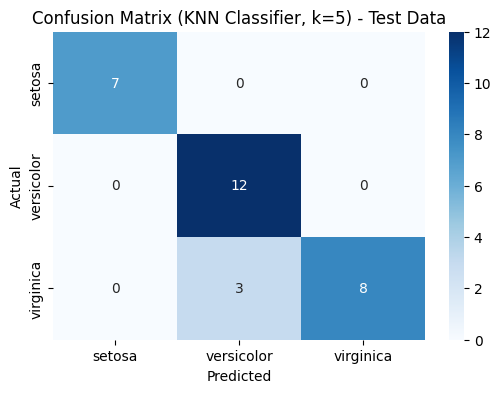

In [ ]:
#Used average = 'macro' because the iris dataset is a balanced dataset and we have more than 2 classes
precision = precision_score(y_test, x_test_pred, average='macro')
recall = recall_score(y_test, x_test_pred, average='macro')
f1 = f1_score(y_test, x_test_pred, average='macro')

print("\nKNN Classifier (k=5) Performance on Test Data:")
print(f"Precision (macro): {precision:.4f}")
print(f"Recall (macro): {recall:.4f}")
print(f"F1-Score (macro): {f1:.4f}")

# Plot confusion matrix for test data
cm = confusion_matrix(y_test, x_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['setosa', 'versicolor', 'virginica'], yticklabels=['setosa', 'versicolor', 'virginica'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (KNN Classifier, k=5) - Test Data')
plt.show()

Testing for different K values


KNN Classifier (k=1):
Training Accuracy: 1.0000
Test Accuracy: 0.9000
Precision (macro): 0.9154
Recall (macro): 0.9116
F1-Score (macro): 0.9124


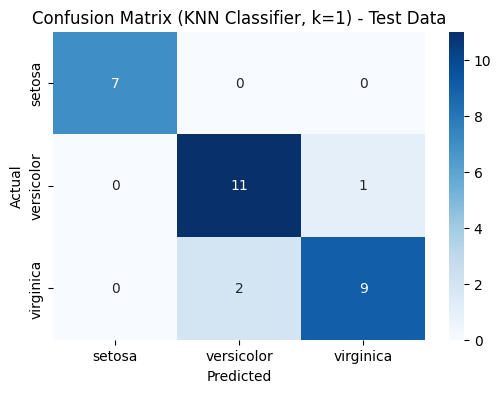

---------------------------------------------------------------------------------------------------------------------------

KNN Classifier (k=2):
Training Accuracy: 1.0000
Test Accuracy: 0.9000
Precision (macro): 0.9154
Recall (macro): 0.9116
F1-Score (macro): 0.9124


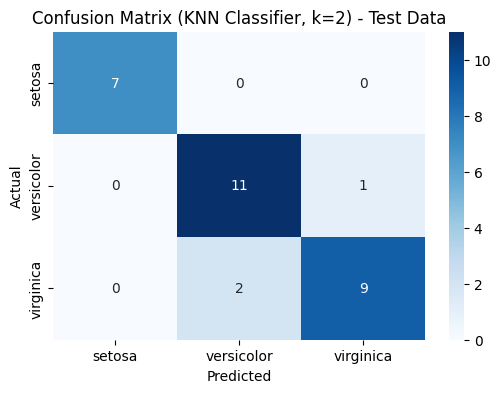

---------------------------------------------------------------------------------------------------------------------------

KNN Classifier (k=3):
Training Accuracy: 0.9750
Test Accuracy: 0.8667
Precision (macro): 0.8952
Recall (macro): 0.8640
F1-Score (macro): 0.8755


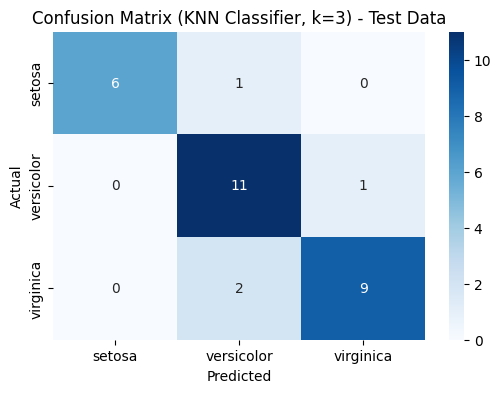

---------------------------------------------------------------------------------------------------------------------------

KNN Classifier (k=4):
Training Accuracy: 0.9917
Test Accuracy: 0.9333
Precision (macro): 0.9524
Recall (macro): 0.9394
F1-Score (macro): 0.9410


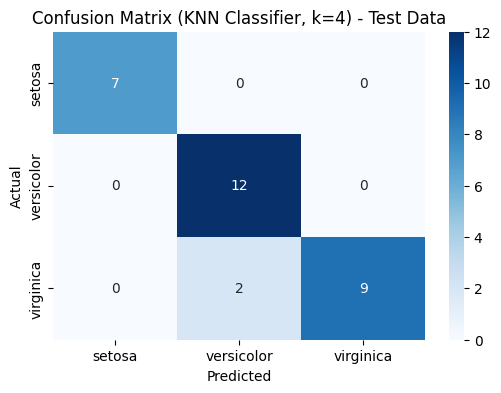

---------------------------------------------------------------------------------------------------------------------------

KNN Classifier (k=5):
Training Accuracy: 0.9750
Test Accuracy: 0.9000
Precision (macro): 0.9333
Recall (macro): 0.9091
F1-Score (macro): 0.9103


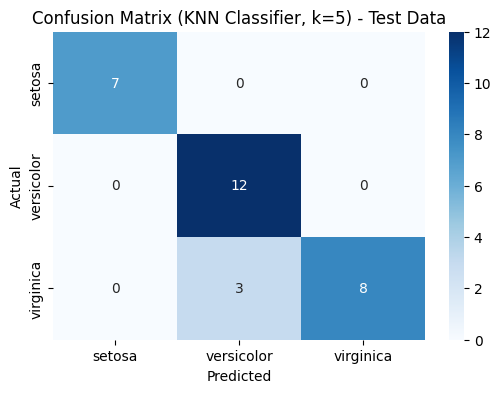

---------------------------------------------------------------------------------------------------------------------------

KNN Classifier (k=6):
Training Accuracy: 0.9917
Test Accuracy: 0.9333
Precision (macro): 0.9524
Recall (macro): 0.9394
F1-Score (macro): 0.9410


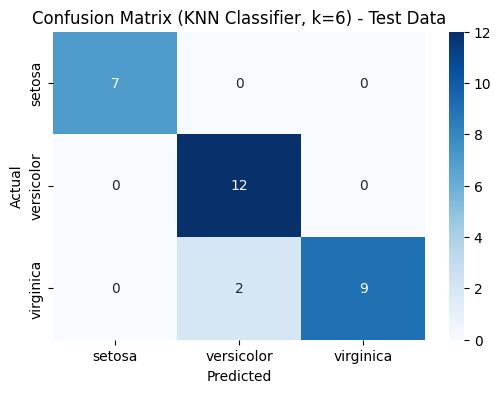

---------------------------------------------------------------------------------------------------------------------------

KNN Classifier (k=7):
Training Accuracy: 0.9833
Test Accuracy: 0.9333
Precision (macro): 0.9524
Recall (macro): 0.9394
F1-Score (macro): 0.9410


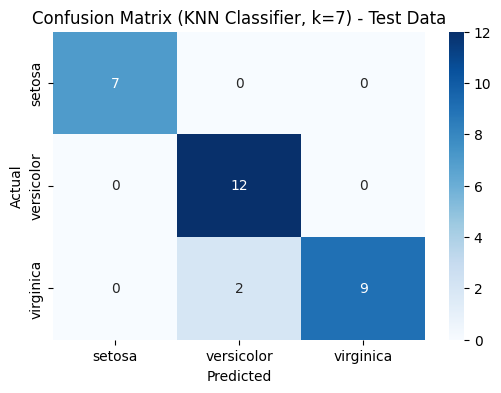

---------------------------------------------------------------------------------------------------------------------------

KNN Classifier (k=8):
Training Accuracy: 0.9917
Test Accuracy: 0.9000
Precision (macro): 0.9154
Recall (macro): 0.9116
F1-Score (macro): 0.9124


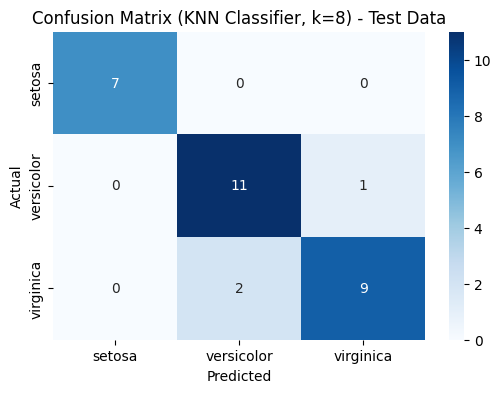

---------------------------------------------------------------------------------------------------------------------------

KNN Classifier (k=9):
Training Accuracy: 0.9750
Test Accuracy: 0.9000
Precision (macro): 0.9154
Recall (macro): 0.9116
F1-Score (macro): 0.9124


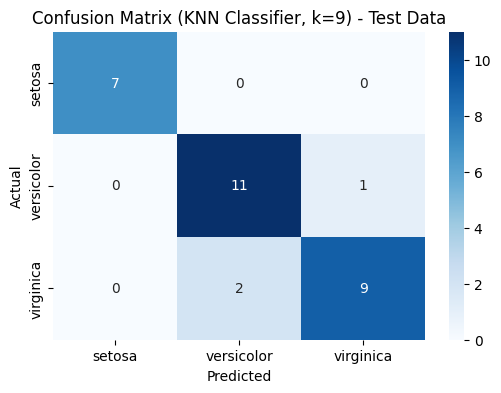

---------------------------------------------------------------------------------------------------------------------------

KNN Classifier (k=10):
Training Accuracy: 0.9833
Test Accuracy: 0.9000
Precision (macro): 0.9154
Recall (macro): 0.9116
F1-Score (macro): 0.9124


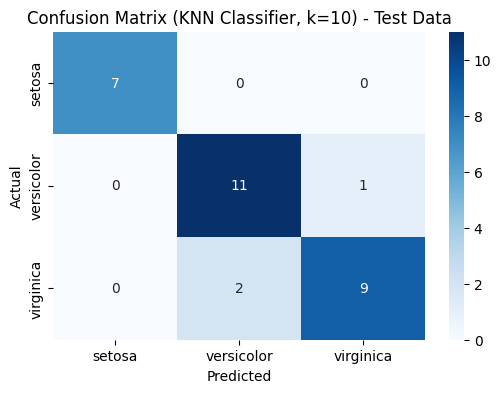

---------------------------------------------------------------------------------------------------------------------------

KNN Classifier (k=11):
Training Accuracy: 0.9750
Test Accuracy: 0.9000
Precision (macro): 0.9154
Recall (macro): 0.9116
F1-Score (macro): 0.9124


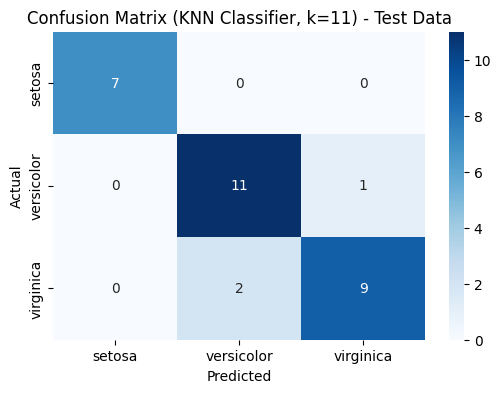

---------------------------------------------------------------------------------------------------------------------------

KNN Classifier (k=12):
Training Accuracy: 0.9917
Test Accuracy: 0.9000
Precision (macro): 0.9154
Recall (macro): 0.9116
F1-Score (macro): 0.9124


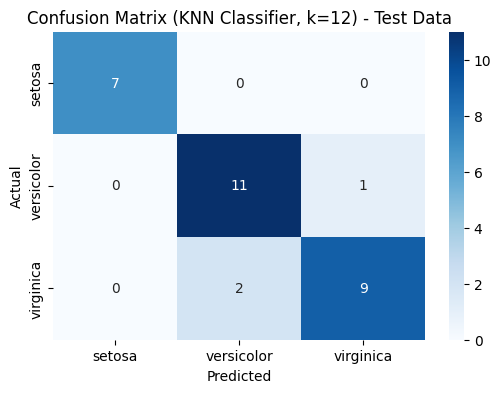

---------------------------------------------------------------------------------------------------------------------------


In [ ]:
# Since there are 150 total values in the dataset, let's check the result for different k's ranging from k = 1 to k = sqrt(150) ~ 12

for k in range(1, 13):
    classifier = KNN(k=k)
    classifier.fit(x_train, y_train)

    # Training data
    x_train_pred = classifier.predict(x_train)
    training_data_acc = accuracy_score(y_train, x_train_pred)

    # Test data
    x_test_pred = classifier.predict(x_test)
    test_data_acc = accuracy_score(y_test, x_test_pred)
    precision = precision_score(y_test, x_test_pred, average='macro')
    recall = recall_score(y_test, x_test_pred, average='macro')
    f1 = f1_score(y_test, x_test_pred, average='macro')

    print(f"\nKNN Classifier (k={k}):")
    print(f"Training Accuracy: {training_data_acc:.4f}")
    print(f"Test Accuracy: {test_data_acc:.4f}")
    print(f"Precision (macro): {precision:.4f}")
    print(f"Recall (macro): {recall:.4f}")
    print(f"F1-Score (macro): {f1:.4f}")

    # Plot confusion matrix for test data
    cm = confusion_matrix(y_test, x_test_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['setosa', 'versicolor', 'virginica'], yticklabels=['setosa', 'versicolor', 'virginica'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix (KNN Classifier, k={k}) - Test Data')
    plt.show()

    print('---------------------------------------------------------------------------------------------------------------------------')